In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier

In [326]:
df = pd.read_csv('churn.csv')

In [327]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [328]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [329]:
df.shape

(10000, 14)

In [330]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [331]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [333]:
df.isnull().sum().sum()

0

In [334]:
df.duplicated().sum()

0

In [335]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [336]:
df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]

print(len(df_0), len(df_1))

7963 2037


In [337]:
df_0_sampled = df_0.sample(n=len(df_1), random_state=42)

In [338]:
df_balanced = pd.concat([df_0_sampled, df_1])

In [339]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [340]:
df_balanced['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [341]:
df_balanced.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [342]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
num_columns = numerical_columns

In [343]:
categorical_columns = ["Geography", "Gender"]
categorical_columns

['Geography', 'Gender']

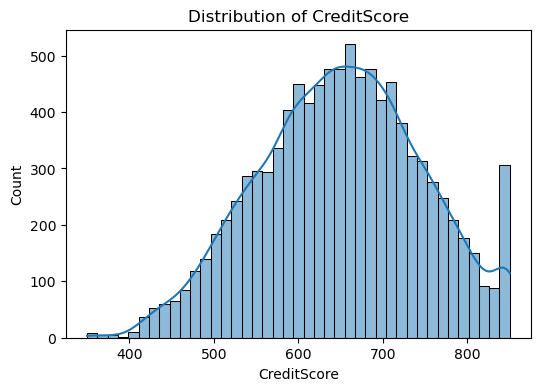

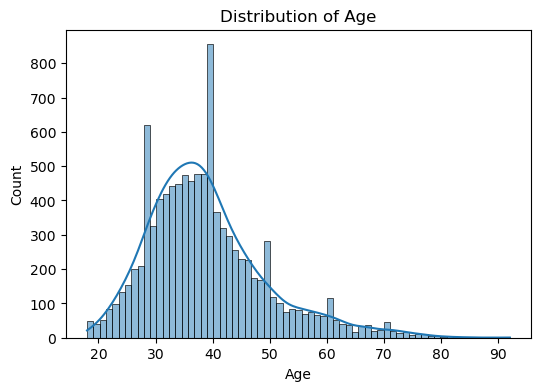

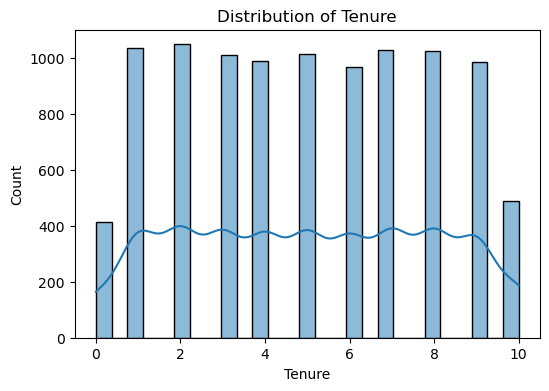

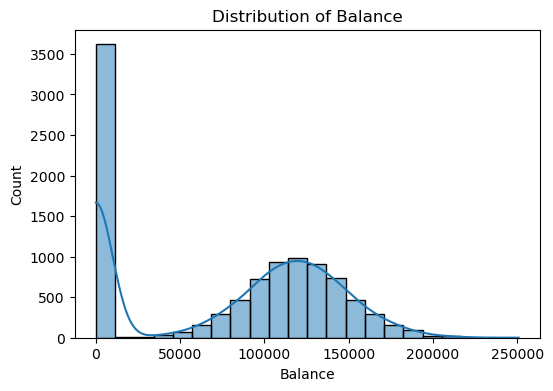

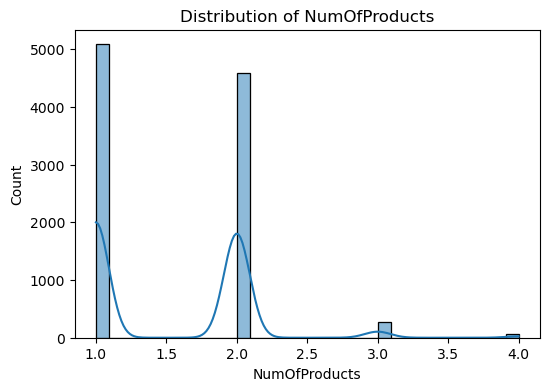

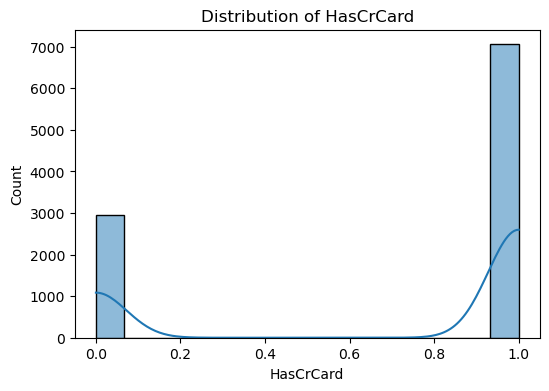

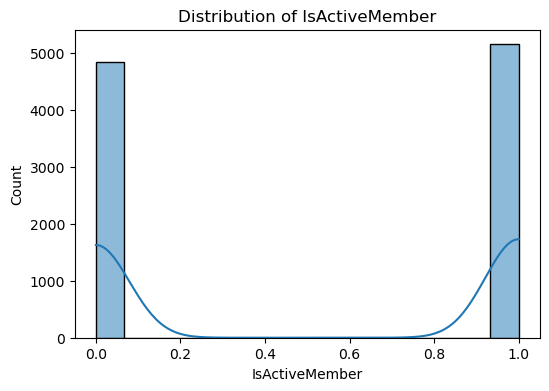

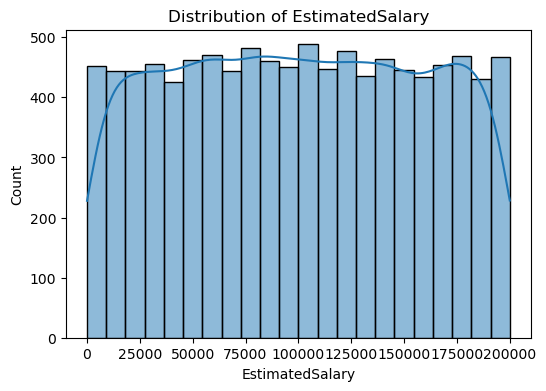

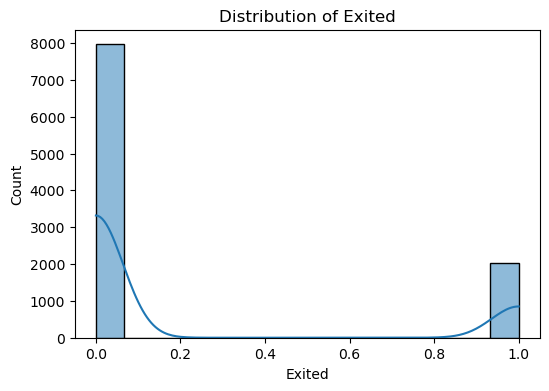

In [344]:
for i in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

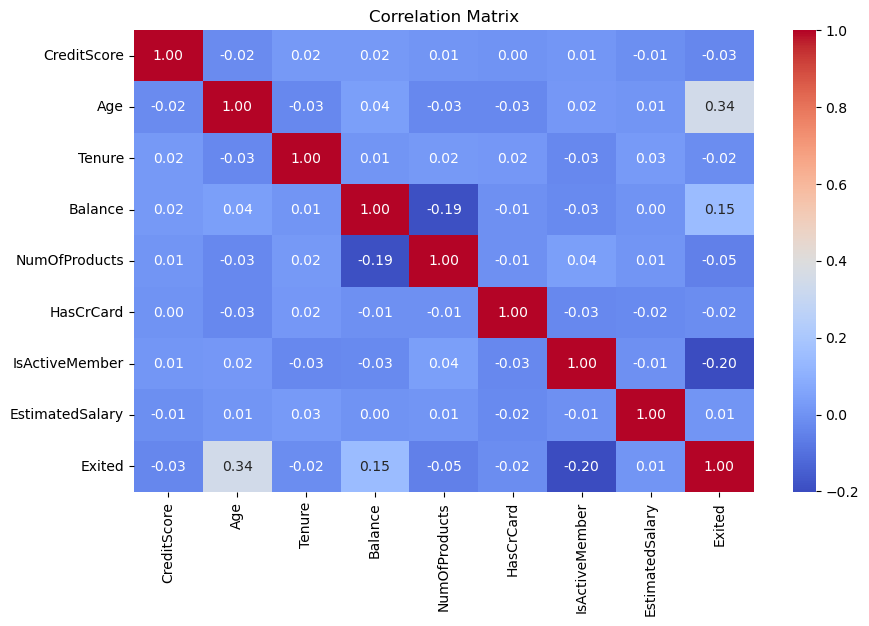

In [345]:
plt.figure(figsize=(10,6))
sns.heatmap(df_balanced.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [346]:
df_balanced['Geography'].value_counts()

Geography
France     1901
Germany    1245
Spain       928
Name: count, dtype: int64

<Axes: xlabel='Geography'>

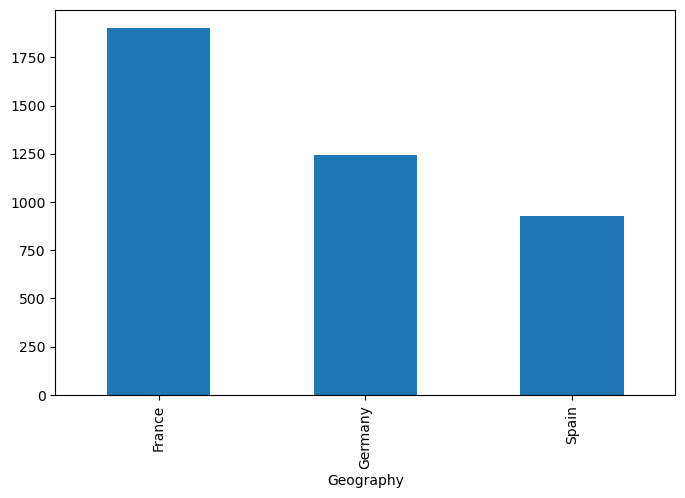

In [347]:
df_balanced['Geography'].value_counts().plot(kind='bar', figsize=(8,5))

In [348]:
df_balanced['Gender'].value_counts()

Gender
Male      2084
Female    1990
Name: count, dtype: int64

<Axes: xlabel='Gender'>

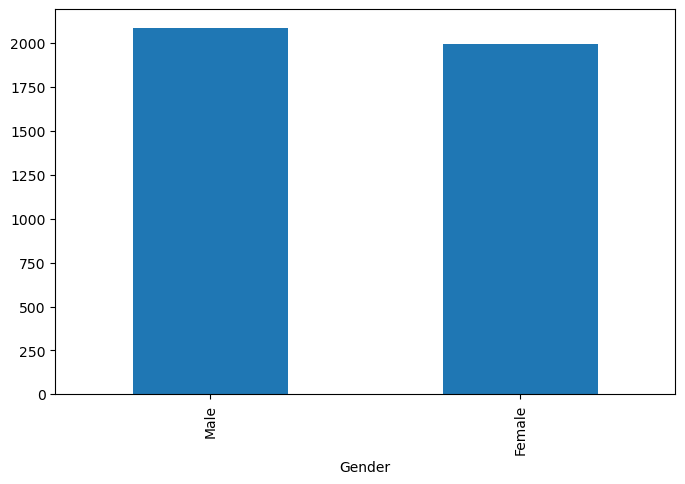

In [349]:
df_balanced['Gender'].value_counts().plot(kind='bar', figsize=(8,5))

In [350]:
X = df_balanced.drop(columns=["Exited"])
y = df_balanced["Exited"]

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [352]:
num_columns = ["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]

In [353]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_columns),
        ("cat", OneHotEncoder(drop="first",
                              handle_unknown="ignore",
                              sparse_output=False),
         categorical_columns)
    ]
)

In [354]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

In [355]:
all_features = preprocessor.get_feature_names_out()

In [356]:
X_train_df = pd.DataFrame(
    X_train_transformed,
    columns=all_features,
    index=X_train.index
)

X_test_df = pd.DataFrame(
    X_test_transformed,
    columns=all_features,
    index=X_test.index
)

In [357]:
print(X_train_df.head())

      num__CreditScore  num__Age  num__Tenure  num__Balance  \
2452          0.371884 -0.578488    -0.331807      0.921344   
2614         -1.386863  2.867777    -0.679734      0.286556   
2928         -1.632270  0.911788    -0.679734     -1.321376   
88           -0.210956  0.818646     1.059902     -1.321376   
1064          1.241033  1.284358     1.407830     -0.295072   

      num__NumOfProducts  num__HasCrCard  num__IsActiveMember  \
2452           -0.759673        0.640478             -0.92974   
2614           -0.759673        0.640478              1.07557   
2928            0.737167       -1.561334              1.07557   
88             -0.759673       -1.561334             -0.92974   
1064            0.737167        0.640478             -0.92974   

      num__EstimatedSalary  cat__Geography_Germany  cat__Geography_Spain  \
2452              0.221535                     0.0                   1.0   
2614             -0.337141                     0.0                   1.0   
29

In [358]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train_df, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [359]:
y_train_pred = model.predict(X_train_df)
y_test_pred  = model.predict(X_test_df)

In [360]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.7127953359926358
Test Accuracy : 0.6895705521472393


In [361]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       406
           1       0.69      0.68      0.69       409

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815



### USING KNN Classifier ###

In [362]:
n = int(math.sqrt(len(X_train_df)))

In [363]:
knn = KNeighborsClassifier(
    n_neighbors=n,
    metric="minkowski",
    p=2
)

In [364]:
knn.fit(X_train_df, y_train)

KNeighborsClassifier(n_neighbors=57)

In [365]:
y_knn_pred = knn.predict(X_test_df)

In [366]:

print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       406
           1       0.74      0.70      0.72       409

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815

